In [31]:
#import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Load the preprocessed dataset
df = pd.read_csv("Data/PreprocessedCar.csv")
print(df.columns)  # Check column names

if 'Seats' in df.columns:
    df = df.drop(columns=['Seats'])


Index(['Company Names', 'Battery Capacity_CC', 'HorsePower_hp',
       'Total Speed_km/h', 'Acceleration_0_100_sec', 'Fuel Types', 'Seats',
       'Torque_Nm', 'Cars Prices_USD'],
      dtype='object')


In [33]:
#One-Hot Encoding before training the model
df = pd.get_dummies(df, columns=['Fuel Types'], drop_first=True)

In [34]:
# Define features and target
X = df.drop(columns=['Cars Prices_USD'])
y = df['Cars Prices_USD']


In [35]:
#one-hot encode 'Company Name'
df = pd.get_dummies(df, columns=['Company Names'], drop_first=True)


In [36]:
from sklearn.model_selection import train_test_split

# Define features and target (assuming df is already cleaned and encoded)
X = df.drop(columns=['Cars Prices_USD'])  # Features
y = df['Cars Prices_USD']                 # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40
)

# Confirm the split
print(f"Train set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Train set size: 1071 rows
Test set size: 460 rows


In [37]:
from sklearn.preprocessing import StandardScaler



In [38]:
from sklearn.svm import SVR

# Select only the numeric columns for scaling (matching the columns used in X_train_numeric)
numeric_cols = [
	'Battery Capacity_CC', 'HorsePower_hp', 'Total Speed_km/h',
	'Acceleration_0_100_sec', 'Torque_Nm',
	'Fuel Types_Diesel', 'Fuel Types_Electric', 'Fuel Types_Hybrid',
	'Fuel Types_Hydrogen', 'Fuel Types_Petrol', 'Fuel Types_Plug-in Hybrid'
]

# Create new X_train_numeric and X_test_numeric from the latest split
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Initialize the SVR model (you can try different kernels too)
svm_model = SVR(kernel='rbf')  # 'rbf' is a good starting point

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)


SVR()

In [39]:
#predict on the test scaled data
y_pred_svm = svm_model.predict(X_test_scaled)


In [40]:
import numpy as np

# Evaluate the SVM model
print(" SVM Model Evaluation:")
# Use the y_test from the SVM split (before any re-split)
print("R² Score:", r2_score(y_test, y_pred_svm))
print("MAE:", mean_absolute_error(y_test, y_pred_svm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svm)))


 SVM Model Evaluation:
R² Score: -0.1040287610177002
MAE: 24705.630421344205
RMSE: 34661.034892398704


<hr>

In [41]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=40)

# Train on original (not scaled) data
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=40)

In [42]:
# Predict on the test set
X = df.drop(columns=['Cars Prices_USD'])
y = df['Cars Prices_USD']

# Re-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [43]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [44]:
# Evaluate performance
print(" Decision Tree Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

 Decision Tree Evaluation:
R² Score: 0.9212140222294313
MAE: 5095.321376811594
RMSE: 9259.249706456223


<hr>

In [45]:
# Random Forest (RF) Decision Tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40
)
#Train Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
#predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [47]:
#Evaluate the Random Forest model
import numpy as np

print(" Random Forest Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

 Random Forest Evaluation:
R² Score: 0.9460729226944249
MAE: 4761.140064527261
RMSE: 7660.458665832942


<hr>

In [48]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # You can adjust alpha later

#Since Ridge is sensitive to feature scales, use:

ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Model
print(" Ridge Regression Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


 Ridge Regression Evaluation:
R² Score: 0.8429856734310661
MAE: 9078.697535285377
RMSE: 13071.365914457998


<hr>

In [49]:
#K-Nearest Neighbors (KNN) Regressor
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune k later
#Train the Model (use scaled features!)
knn_model.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)


In [50]:
#Evaluate the KNN model
print(" KNN Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

 KNN Evaluation:
R² Score: 0.8961444670019391
MAE: 6798.729565217392
RMSE: 10630.804983496331


<hr>

In [51]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#Train the Model
# Degree 2 is usually a safe starting point
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Use scaled features for better performance
poly_model.fit(X_train_scaled, y_train)
#predict on the test set
y_pred_poly = poly_model.predict(X_test_scaled)


In [52]:
#Evaluate the polynomial regression model
print(" Polynomial Regression Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

 Polynomial Regression Evaluation:
R² Score: 0.8373194388123442
MAE: 8933.141072837665
RMSE: 13305.131242292004


<hr>

In [53]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # You can try other alpha values too
# Train the model on scaled features
lasso_model.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)


In [54]:
#Evaluate Performance
print("Lasso Regression Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression Evaluation:
R² Score: 0.8429350760934811
MAE: 9077.846666330674
RMSE: 13073.47184662143


<hr>

 Model Performance Comparison (Excluding SVM)

| Model             | R² Score | MAE ($) | RMSE ($) |
|------------------|----------|---------|----------|
| Random Forest     | 0.946    | 4,761   | 7,660    |
| Decision Tree     | 0.921    | 5,095   | 9,259    |
| Ridge Regression  | 0.843    | 9,079   | 13,071   |
| Lasso Regression  | 0.843    | 9,078   | 13,073   |
| Polynomial Reg.   | 0.837    | 8,933   | 13,305   |


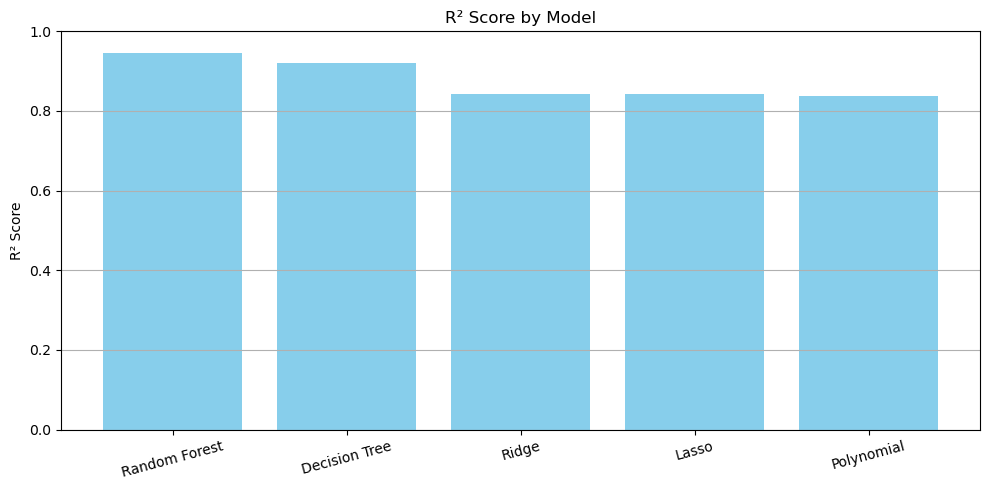

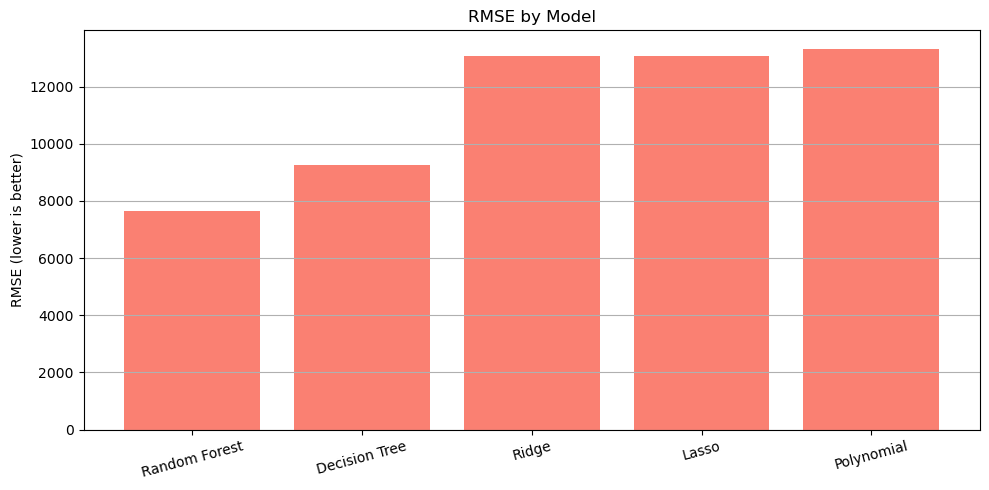

In [55]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Decision Tree', 'Ridge', 'Lasso', 'Polynomial']
r2 = [0.946, 0.921, 0.843, 0.843, 0.837]
rmse = [7660, 9259, 13071, 13073, 13305]

# Plot R²
plt.figure(figsize=(10, 5))
plt.bar(models, r2, color='skyblue')
plt.title('R² Score by Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse, color='salmon')
plt.title('RMSE by Model')
plt.ylabel('RMSE (lower is better)')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Simple notes**

Best Model: Random Forest
Lowest RMSE → Smallest average error
Also less sensitive to outliers and nonlinear patterns

SVM Performed Worst:Performed worse than just predicting the mean (hence R² < 0)and very sensitive to feature scaling, kernel choice, and hyperparameters.